# Assessing & Exploring 
Use [README file](http://www.fueleconomy.gov/feg/epadata/Readme.txt) or [This pdf](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to know more abou the datasets and columns\
Explore `all_alpha_08.csv` and `all_alpha_18.csv` and the questions below.

In [173]:
# 1- number of samples in each dataset?
# 2- number of columns in each dataset? 
# 3- duplicate rows in each dataset? 
# 4- number of features with missing values in both datasets?
# 5- datatypes of columns in each dataset ?
# 6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#           
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)?
# 8- how is the column "cyl" different in both datasets? (checkbox)
#                  A- Datatype  B- Number of unique value C- No of samples
# 9- What are the types of fuel present in each dataset ?
# 10- What are the fuel types that exist in a dataset and not the other? 

In [174]:
# import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df08=pd.read_csv("../data/all_alpha_08.csv")
df18=pd.read_csv("../data/all_alpha_18.csv")


In [175]:
# 1- number of samples and columns in each dataset? 
print(df08.shape[0])
print(df18.shape[0])

2404
1611


In [176]:
# 3- duplicate rows in each dataset?
print(df08[df08.duplicated()])
print(df18[df18.duplicated()])

                    Model  Displ      Cyl    Trans Drive      Fuel Sales Area   
752   DODGE Sprinter 2500    3.5      NaN      NaN   NaN  Gasoline         FA  \
754   DODGE Sprinter 2500    3.5      NaN      NaN   NaN  Gasoline         CA   
769             FORD E150    4.6      NaN      NaN   NaN  Gasoline         FA   
771             FORD E150    4.6      NaN      NaN   NaN  Gasoline         CA   
773             FORD E150    5.4      NaN      NaN   NaN  Gasoline         FA   
775             FORD E150    5.4      NaN      NaN   NaN  Gasoline         CA   
794             FORD E350    5.4      NaN      NaN   NaN  Gasoline         FA   
797             FORD E350    5.4      NaN      NaN   NaN  Gasoline         CA   
800             FORD E350    5.4      NaN      NaN   NaN  Gasoline         FA   
958     FREIGHTLINER 2500    3.5      NaN      NaN   NaN  Gasoline         FA   
960     FREIGHTLINER 2500    3.5      NaN      NaN   NaN  Gasoline         CA   
1000      GMC Savana 1500   

In [177]:
# 4- number of features with missing values in 2008?
df08.isna().sum()



Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [178]:
# 4- number of features with missing values in 2018?

df18.isna().sum()


Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [179]:
# 5- datatypes of columns in each dataset ?
df08.dtypes
df18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [180]:
#6- How many columns are differe
# nt from each other (that do not share the same datatype) [type the name of columns]?


dtypes=df08.dtypes

groub=dtypes.groupby(dtypes).groups

for eachtype,cols in groub.items():
    print(eachtype,cols.tolist())

float64 ['Displ', 'Unadj Cmb MPG']
object ['Model', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay']


In [181]:
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)
for col in df08.columns:
    print(col,df08[col].nunique(dropna=True))
for col in df18.columns:
    print(col,df18[col].nunique(dropna=True))


Model 436
Displ 47
Cyl 8
Trans 14
Drive 2
Fuel 5
Sales Area 3
Stnd 12
Underhood ID 343
Veh Class 9
Air Pollution Score 13
FE Calc Appr 2
City MPG 39
Hwy MPG 43
Cmb MPG 38
Unadj Cmb MPG 721
Greenhouse Gas Score 20
SmartWay 2
Model 367
Displ 36
Cyl 7
Trans 26
Drive 2
Fuel 5
Cert Region 2
Stnd 19
Stnd Description 19
Underhood ID 230
Veh Class 9
Air Pollution Score 6
City MPG 58
Hwy MPG 62
Cmb MPG 57
Greenhouse Gas Score 10
SmartWay 3
Comb CO2 299


In [182]:
# 8- how is the column "Cyl" different in both datasets?
print(pd.concat([df08["Cyl"], df18["Cyl"]]).drop_duplicates())


0        (6 cyl)
2        (4 cyl)
16      (12 cyl)
24       (8 cyl)
88      (10 cyl)
246     (16 cyl)
354      (5 cyl)
389          NaN
1530     (2 cyl)
0            6.0
4            4.0
64           5.0
88          12.0
90          16.0
180          8.0
1207         3.0
Name: Cyl, dtype: object


In [183]:
# 9- What are the types of fuel present in each dataset ?
print(df08['Fuel'].unique())
print(df18['Fuel'].unique())

['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG']
['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']


# Cleaning

## Cleaning - Column Labels

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:\
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'\
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [184]:
# drop the columns from 2008
df08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1,inplace=True)

In [185]:
# drop the columns from 2018
df18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)

## Cleaning -  Rename Columns
**Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.**\
**Rename all column labels to replace spaces with underscores and convert everything to lowercase.**\
(Underscores can be much easier to work with in Python than spaces.\
For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query().\
Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [186]:
# rename the column
df08.rename(columns={"Sales Area": "Cert Region"},inplace=True)


In [187]:
# fix columns in both datasets
df08.rename(columns=lambda x: x.strip().lower().replace(" ","_") ,inplace=True)
df18.rename(columns=lambda x: x.strip().lower().replace(" ","_") ,inplace=True)


In [188]:
# confirm that both datasets share the exact column names:
df08.columns==df18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [189]:
# save the new datasets as "data_08_v1.csv" and 'data_18_v1.csv'.
df08.to_csv("../data/data_08_v1.csv")
df18.to_csv("../data/data_18_v1.csv")


## Cleaning - Filter, Drop Nulls, Dedupe
For consistency, only compare cars certified by California standards.\
Filter both datasets using query to select only rows where "cert_region" is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

Use `data_08_v1.csv` and `data_18_v1.csv` that you just saved


### Filter by Certification Region

In [190]:
# filter datasets for rows following California standards using query
df08_v1=pd.read_csv('../data/data_08_v1.csv')
df18_v1=pd.read_csv('../data/data_18_v1.csv')
# df08_v1.query('cert_region == "CA"')
df1=df08_v1.query("cert_region=='CA'")
df2=df18_v1.query("cert_region=='CA'")

In [191]:
# confirm only certification region is California
print(df1['cert_region'].unique()==['CA'])
print(df2['cert_region'].unique()==['CA'])

# .drop('cert_region',axis=1)

[ True]
[ True]


In [192]:
# drop certification region columns form both datasets
df1.drop('cert_region',axis=1,inplace=True)
df1.head()
# df2.drop('cert_region',axis=1,inplace=True)
# df1.drop('cert_region',axis=1)
# df2.drop('cert_region',axis=1,inplace=True)

/tmp/ipykernel_6757/3087078410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('cert_region',axis=1,inplace=True)


,Unnamed: 0,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


### Drop Rows with Missing Values

In [193]:
# drop rows with any null values in both datasets
print (df1.shape)
df1=df1.dropna()
df2=df2.dropna()
df1.isna().sum()

(1084, 14)


Unnamed: 0              0
model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [194]:
# checks if any of the columns have null values

df1.dropna(inplace=True)
df1.isna().any()
# df2.dropna(inplace=True)

Unnamed: 0              False
model                   False
displ                   False
cyl                     False
trans                   False
drive                   False
fuel                    False
veh_class               False
air_pollution_score     False
city_mpg                False
hwy_mpg                 False
cmb_mpg                 False
greenhouse_gas_score    False
smartway                False
dtype: bool

### Dedupe Data

In [195]:
# print number of duplicates in 2008 and 2018 datasets
print(df1.duplicated().sum())
df2.duplicated().sum()


0


0

In [196]:
# drop duplicates in both datasets
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()


In [197]:
# confirm your changes
df1.duplicated().sum()
df2.duplicated().sum()

0

In [198]:
# check the shape of each dataset -- if the 2008 size isn't (986,13) and 2018 (794,13), you should probably cry.
print(df1.shape)
print(df2.shape)




(1009, 14)
(797, 15)


In [199]:
# make a checkpoint in case you mess up anything later


## Cleaning - Fixing Data Types


### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [200]:
# extract int from string in cyl in the 2008 dataset
df1['cyl'] = df1['cyl'].str.extract('(\d+)', expand=False).astype(int)



In [201]:
# convert the data type of the "cyl" column in the 2018 dataset from float to int 
# for i in df2['cyl']:
#     try:
#         int(i)
#     except ValueError as e:
#         print(e)
#         print(i)
df2['cyl'] = df2['cyl'].astype(int)

In [202]:
# verify that the data type of the column in both datasets is "int"
print(df1['cyl'].dtypes)
print(df2['cyl'].dtypes)


int64
int64


### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [203]:

df1["air_pollution_score"]=df1["air_pollution_score"].astype(float)


ValueError: could not convert string to float: '6/4'

In [ ]:
# you should have faced an error, get the row that caused that error
for i,row in df1.iterrows():
    try:
        df1.loc[i,'air_pollution_score'] = float(row['air_pollution_score'])
    except ValueError as e:
   

        print('i',i,row['air_pollution_score'])
        print(row)

i 1550 6/4
Unnamed: 0                            1550
model                   MERCEDES-BENZ C300
displ                                  3.0
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object


# It's not just the air pollution score!
The cars that have more than one type of fuel in a single row are hybrid (run on more than one type of fuel)! Multiple columns will be affected too!\
    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."\
This is why you can see that multiple columns contain more than one value


In [ ]:
# You have two options here: (1) Split the row by "/" into two rows, 
#(2) just drop the rows that contain the ("/") in any of the columns
# You will lose a point for each dataset if you go with the second option

In [ ]:
# to split the rows---->
# 1- get the rows that contain / in the fuel column
# 2- make two copies of these rows
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the /  
# 5- drop the original row from the dataset
# 6- append the newely created rows to the original dataframe
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)






In [210]:


hb_08 = df1[ df1['fuel'].str.contains('/')]
d1 = hb_08.copy()
d2 = hb_08.copy()
hb_08


,Unnamed: 0,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [211]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns:
    d1[c] = d1[c].apply(lambda x: x.split("/")[0])
    d2[c] = d2[c].apply(lambda x: x.split("/")[1])
new_rows = pd.concat([d1,d2],axis=0)
new_rows

,Unnamed: 0,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [212]:

df1.drop(hb_08.index, inplace=True)

df1 =  pd.concat([df1,new_rows],axis=0) 
df1.head()

,Unnamed: 0,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


This is the row before splitting\
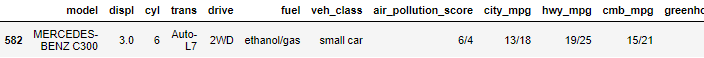

This what it should look like after splitting\
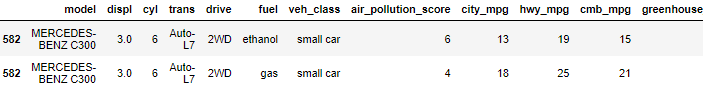

### Repeat this process for the 2018 dataset

In [204]:
hb_18 = df2[ df2['fuel'].str.contains('/')]
d1 = hb_18.copy()
d2 = hb_18.copy()
hb_18


,Unnamed: 0,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
382,382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No
394,394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,CA,pickup,5,12/18,16/24,14/20,4,No
396,396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,CA,pickup,5,12/17,15/22,13/19,3,No
398,398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,CA,pickup,3,12/16,17/23,14/19,3,No
428,428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,CA,standard SUV,3,12/16,17/23,14/19,3,No
432,432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,CA,standard SUV,3,11/16,15/22,12/18,3,No


In [205]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    d1[c] = d1[c].apply(lambda x: x.split("/")[0])
    d2[c] = d2[c].apply(lambda x: x.split("/")[1])
new_rows = pd.concat([d1,d2],axis=0)
new_rows
df2.drop(hb_18.index, inplace=True)
df2 =  pd.concat([df2,new_rows],axis=0) 

In [206]:
hb_18 = df2[ df2['fuel'].str.contains('/')]
hb_18

,Unnamed: 0,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [213]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df1[c] = df1[c].astype(float)
    df2[c] = df2[c].astype(float)

In [ ]:
# convert to float


## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [214]:
# convert the data type from float to int in the 2008 dataset
df1['greenhouse_gas_score'] = df1['greenhouse_gas_score'].astype(int)

In [215]:
#### check that all columns and their data type in the 2008 dataset matches excatly the ones in the 2018 dataset
#### all columns MUST be the same data type
df1.dtypes

Unnamed: 0                int64
model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [216]:
# check the shape of both datasets
df2.dtypes


Unnamed: 0                int64
model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [217]:
# Save your final CLEAN datasets as "clean_08.csv" and "clean_18.csv"
df1.to_csv('../data/clean_08.csv', index=False)
df2.to_csv('../data/clean_18.csv', index=False)